**ПРАКТИЧЕСКАЯ РАБОТА 6. РАБОТА С ИЗОБРАЖЕНИЯМИ. БИБЛИОТЕКА PILLOW**

Коршиков Иван Сергеевич ПИН-б-о-22-1 09.03.03 Прикладная информатика

Цель работы: научиться обрабатывать изображения с использованием библиотеки Pillow. Задачи лабораторной работы: – научиться открывать, сохранять и конвертировать изображения; – научиться работать каналами изображений; – научиться фильтровать, трансформировать изображения.

In [ ]:
import requests

url = "https://cdn-irec.r-99.com/sites/default/files/imagecache/300o/product-images/134817/40.jpg"
resp = requests.get(url)
print(resp)
with open("cat.jpeg", "wb") as file:
    file.write(resp.content)


<Response [200]>


In [ ]:
from PIL import Image

print(type(Image))

with Image.open("cat.jpeg") as img:
    img.load()

img.show()

<class 'module'>


In [ ]:
print(img.size)

(300, 300)


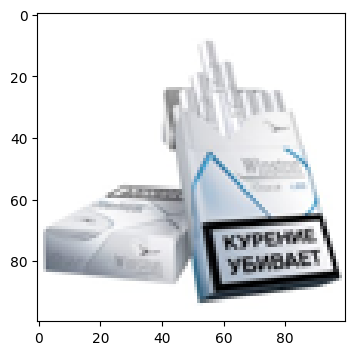

In [ ]:
kh, kw  = img.width // 3, img.height // 3
from matplotlib import pyplot
img_resize = img.resize((kh, kw))
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.imshow(img_resize)

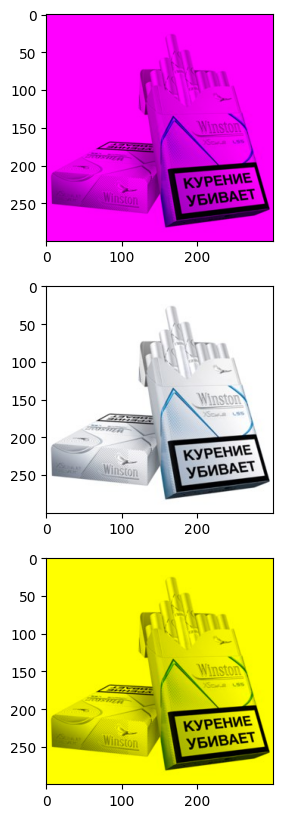

In [ ]:
red, green, blue = img.split()
z = red.point(lambda _: 0)
purple_img = Image.merge("RGB", (red, z, blue))
gray_img = Image.merge("RGB", (red, green, blue))
yellow_img = Image.merge("RGB", (red, green, z))

fig, axes = plt.subplots(nrows= 3, ncols= 1, figsize=(10,10))

axes[0].imshow(purple_img)
axes[1].imshow(gray_img)
axes[2].imshow(yellow_img)


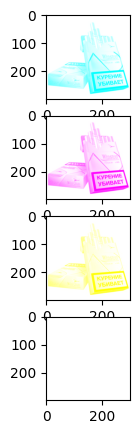

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

cmyk_img = img.convert('CMYK')

C,M,Y,K = cmyk_img.split()

zeros = red.point(lambda _: 0)
c_img = Image.merge("CMYK", (C, zeros, zeros, zeros))
m_img = Image.merge("CMYK",(zeros, M, zeros, zeros))
y_img = Image.merge("CMYK", (zeros, zeros, Y, zeros))
k_img = Image.merge("CMYK", (zeros, zeros, zeros, K))

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,5))
axes[0].imshow(c_img)
axes[1].imshow(m_img)
axes[2].imshow(y_img)
axes[3].imshow(k_img)



In [ ]:
from PIL import ImageFilter
c = 0
filters = [ImageFilter.BLUR, ImageFilter.SHARPEN, ImageFilter.SMOOTH,ImageFilter.CONTOUR,ImageFilter.DETAIL,ImageFilter.EDGE_ENHANCE,ImageFilter.SMOOTH_MORE,ImageFilter.EMBOSS,ImageFilter.EDGE_ENHANCE_MORE]
fig, axes = plt.subplots(nrows= 3, ncols= 3, figsize= (24,20))
for i in range(3):
    for j in range(3):

        axes[i, j].imshow(img.filter(filters[c]))
        c += 1

Output hidden; open in https://colab.research.google.com to view.